In [22]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

# Red Neuronal - Predicción de la Longitud de Pétalo de Iris

In [23]:
# Cargar el dataset de iris
iris = datasets.load_iris()

x_vals = np.array([x[0:3] for x in iris.data])
y_vals = np.array([x[3] for x in iris.data])

# Configurar las semillas para reproducibilidad
seed = 19
tf.random.set_seed(seed)
np.random.seed(seed)

# División de datos en conjunto de entrenamiento y prueba
train_idx = np.random.choice(len(x_vals), round(len(x_vals) * 0.8), replace=False)
test_idx = np.array(list(set(range(len(x_vals))) - set(train_idx)))

x_vals_train = x_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_train = y_vals[train_idx]
y_vals_test = y_vals[test_idx]

# Normalización de los datos
def normalize_col(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m - col_min) / (col_max - col_min)

x_vals_train = np.array(np.nan_to_num(normalize_col(x_vals_train)), dtype="float32")
x_vals_test = np.array(np.nan_to_num(normalize_col(x_vals_test)), dtype="float32")

batch_size = 100

# Definir variables
hidden_layer_nodes = 5
A1 = tf.Variable(tf.random.normal(shape=[3, hidden_layer_nodes]), dtype="float32")
b1 = tf.Variable(tf.random.normal(shape=[hidden_layer_nodes]), dtype="float32")
A2 = tf.Variable(tf.random.normal(shape=[hidden_layer_nodes, 1]), dtype="float32")
b2 = tf.Variable(tf.random.normal(shape=[1]), dtype="float32")

# Función para el modelo
@tf.function
def model(x_data):
    hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data, A1), b1))
    final_output = tf.nn.relu(tf.add(tf.matmul(hidden_output, A2), b2))
    return final_output

# Función para calcular la pérdida
def compute_loss(y_target, final_output):
    return tf.reduce_mean(tf.square(y_target - final_output))

# Optimizador
optimizer = tf.optimizers.SGD(learning_rate=0.0005)

# Listas para almacenar las pérdidas
loss_vect = []
test_loss = []

# Entrenamiento
for i in range(1000):
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = np.array(x_vals_train[rand_idx], dtype="float32")
    rand_y = np.transpose([y_vals_train[rand_idx]])

    with tf.GradientTape() as tape:
        final_output = model(rand_x)
        loss = compute_loss(rand_y, final_output)
    
    gradients = tape.gradient(loss, [A1, b1, A2, b2])
    optimizer.apply_gradients(zip(gradients, [A1, b1, A2, b2]))

    # Guardar la pérdida de entrenamiento
    loss_vect.append(np.sqrt(loss.numpy()))

    # Evaluar en el conjunto de prueba
    test_output = model(x_vals_test)
    temp_loss_test = compute_loss(np.transpose([y_vals_test]), test_output)
    test_loss.append(np.sqrt(temp_loss_test.numpy()))

    if (i + 1) % 100 == 0:
        print(f"Paso #{i + 1}, Loss = {loss.numpy()}")

Paso #100, Loss = 1.8693629503250122
Paso #200, Loss = 1.856274127960205
Paso #300, Loss = 1.8679429292678833
Paso #400, Loss = 1.6917537450790405
Paso #500, Loss = 1.1583251953125
Paso #600, Loss = 0.5247839689254761
Paso #700, Loss = 0.5422580242156982
Paso #800, Loss = 0.4813622236251831
Paso #900, Loss = 0.4713219404220581
Paso #1000, Loss = 0.49610257148742676


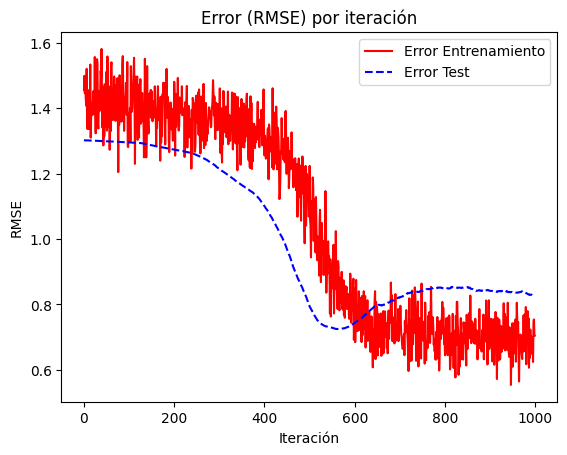

In [24]:
# Graficar resultados
plt.plot(loss_vect, "r-", label="Error Entrenamiento")
plt.plot(test_loss, "b--", label="Error Test")
plt.title("Error (RMSE) por iteración")
plt.xlabel("Iteración")
plt.ylabel("RMSE")
plt.legend(loc="upper right")
plt.show()


Despues de aproximadamente la iteracion 550-600, comienza a haber overfittig (sobreajuste), se nota porque el error de los datos de test es mayor que el de entrenamiento.

El entrenamiento deberia se hasta 500 iteraciones, se dejó para mostrar el overfitting